In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import nltk

In [5]:
import string

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
from unidecode import unidecode

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
df = pd.read_csv("../../../dados/teste/ecommerceDataset.csv", low_memory=False, names=['class', 'text'], header=None)

In [15]:
df

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [16]:
contraction_dict = {
    "aren't": "are not", "can't": "can not", "could've": "could have",
    "couldn't": "could not", "daren't": "dare not", "didn't": "did not",
    "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hasn't": "has not", "haven't": "have not", "he's": "he is",
    "how'd": "how had", "how're": "how are", "how's": "how is",
    "how've": "how have", "i'd": "i had", "i'm": "i am",
    "i've": "i have", "isn't": "is+ not", "it's": "it is",
    "might've": "might have", "mightn't": "might not", "must've": "must have",
    "mustn't": "must not", "needn't": "need not", "oughtn't": "ought not",
    "shan't": "shall not", "she'd": "she had", "she's": "she is",
    "should've": "should have", "shouldn't": "should not", "that'd": "that had",
    "thats's": "that is", "there'd": "there had", "there's": "there is",
    "they'd": "they had", "they're": "you are", "they've": "they have",
    "wasn't": "was+ not", "we'd": "we had", "we're": "we are",
    "we've": "we have", "weren't": "were not", "what'd": "what had",
    "what're": "what are", "what's": "what is", "what've": "what have",
    "when'd": "when had", "when're": "when are", "when's": "when is",
    "when've": "when have", "where'd": "where had", "where're": "where are",
    "where's": "where is", "where've": "where have", "who'd": "who had",
    "who're": "who are", "who's": "who is", "who've": "who have",
    "why'd": "why had", "why're": "why are", "why's": "why is",
    "why've": "why have", "would've": "would have", "wouldn't": "would not",
    "you're": "you are", "you've": "you have", "'cause": "because", 
    "ain't": "is not", "aren't": "are not", "can't": "cannot", 
    "could've": "could have", "he's": "he is", "how'll": "how will",
    "i'll": "i will", "it'll": "it will", "it's": "it is", 
    "she'll": "she will", "she's": "she is", "that'll": "that will",
    "there'll": "there will", "they'll": "they will", "they're": "they are",
    "we'll": "we will", "we're": "we are", "what'll": "what will",
    "when'll": "when will", "where'll": "where will", "who'll": "who will",
    "yo're": "you are", "you'll": "you will"
}

In [17]:
def trocar_contracoes( texto ):
    novas_palavras = []
    lista_palavras = texto.split(" ")
    for palavra in lista_palavras:
        if palavra in contraction_dict:
            palavra = contraction_dict[palavra]
        novas_palavras.append(palavra)
    return " ".join(novas_palavras)

In [18]:
# preparar o texto removendo caracteres especiais e pontuação
def preparar_texto( texto ):
    texto_minusculo = texto.lower()
    mascara = str.maketrans("\n\r\t", "   ", string.punctuation)
    texto_limpo = texto_minusculo.translate(mascara)
    texto_limpo = unidecode(texto_limpo)
    return texto_limpo

In [19]:
count = 0
def limpar_texto( texto ):
    global count
    texto_limpo = ""
    if type(texto) == str:
        texto_sem_contracoes = trocar_contracoes( texto )
        texto_limpo = preparar_texto( texto_sem_contracoes )
    count += 1
    if count % 2000 == 0:
        print(f"Preparando texto: {count}")
    return texto_limpo

df['clean_text'] = df["text"].apply(limpar_texto)

Preparando texto: 2000
Preparando texto: 4000
Preparando texto: 6000
Preparando texto: 8000
Preparando texto: 10000
Preparando texto: 12000
Preparando texto: 14000
Preparando texto: 16000
Preparando texto: 18000
Preparando texto: 20000
Preparando texto: 22000
Preparando texto: 24000
Preparando texto: 26000
Preparando texto: 28000
Preparando texto: 30000
Preparando texto: 32000
Preparando texto: 34000
Preparando texto: 36000
Preparando texto: 38000
Preparando texto: 40000
Preparando texto: 42000
Preparando texto: 44000
Preparando texto: 46000
Preparando texto: 48000
Preparando texto: 50000


In [20]:
df.head()

,class,text,clean_text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf floral framed painting wood 30 inch x 10 i...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf uv textured modern art print framed painti...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",saf flower print framed painting synthetic 135...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,incredible gifts india wooden happy birthday u...


In [21]:
unique_classes = df['class'].unique()

In [22]:
NUM_CLASSES = len(unique_classes)

In [23]:
label_encoder = LabelEncoder()
class_encoded = label_encoder.fit_transform( df['class'] )
class_encoded

array([3, 3, 3, ..., 2, 2, 2])

In [24]:
# [0, 1, 0, 0] == 3
# [0, 0, 0, 1] == 2      One Hot Encoded
# [1, 0, 0, 0] == 1
# [0, 0, 0, 1] == 4

In [25]:
class_encoded.shape[0]

50425

In [26]:
# [3 3 3 ... 2 2 2]  ==>  [ [3], [3], [3], ...., [2], [2]  ]
class_encoded = class_encoded.reshape(class_encoded.shape[0], 1)
class_encoded

array([[3],
       [3],
       [3],
       ...,
       [2],
       [2],
       [2]])

In [27]:
onehot_encoder = OneHotEncoder(sparse_output=False)
class_onehot = onehot_encoder.fit_transform(class_encoded)

In [28]:
class_onehot

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [29]:
Y = class_onehot

In [32]:
# dicionario = { "paper": 10, "plane": 5, "design": 3} 
def gerar_dicionario( column, dicionario_inicial = {}, initial_counter = 0):
    new_column = []
    max_len = 0
    word_counter = initial_counter
    for cell in column:
        cell_tokens = cell.split(" ")
        if len(cell_tokens) > max_len:
            max_len = len(cell_tokens)
        new_cell = []
        for palavra in cell_tokens:
            if palavra in dicionario_inicial:
                numero_palavra = dicionario_inicial[palavra]
                new_cell.append(numero_palavra)
            else:
                numero_palavra = word_counter 
                word_counter = word_counter + 1
                dicionario_inicial[palavra] = numero_palavra
        new_column.append(new_cell)
    return max_len, new_column, dicionario_inicial

In [33]:
dicionario_base = {'<UNKNOW>': 0, '<PAD>': 1}
max_len, texto_numeros, dicionario = gerar_dicionario(df['clean_text'], 
                                             dicionario_inicial=dicionario_base,
                                             initial_counter=2)

In [36]:
X = pad_sequences(texto_numeros, value=dicionario['<PAD>'], 
                  padding='post', maxlen=256)

In [37]:
X[0]

array([ 13,  18,  30,   6,  34,  31,  38,  20,  39,  52,  38,  20,  39,
        48,  34,  12,  26,  65,  66,  34,  34,  34,  38,  70,  23,  34,
        12,  18,  66,  60,  48,  63,  29,  26,  74,  52,  34,  52,  18,
        27,  73,  12,  98,  47,  96,  34,  52,  45,  26,  38,  20, 103,
        34, 113, 103,  38,  29,  60,  39,  26,  60,  44,  37,  52,  56,
        52,  45,  34,  55,  56,  45,  39,  22,  45,  26,  43,  60, 114,
        99,  81,  12, 103, 119,   9,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   

In [38]:
def encode_review( texto, dicionario ):
    tokens = texto.split(" ")
    lista = []
    for token in tokens:
        numero = dicionario.get(token, 0)
        lista.append(numero)
    return lista

In [41]:
VOCAB_SIZE = len(dicionario)

In [48]:
model = Sequential()
model.add( Embedding(input_dim=VOCAB_SIZE, output_dim=64) )
model.add( GlobalAveragePooling1D() )
model.add( Dense(64, activation='relu') )
model.add( Dense(NUM_CLASSES, activation='softmax') )
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [51]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=100)

In [59]:
fit = model.fit(train_X, train_Y, epochs=3, batch_size=512)

Epoch 1/3
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9895 - loss: 0.0443
Epoch 2/3
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9906 - loss: 0.0427
Epoch 3/3
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9918 - loss: 0.0363


In [60]:
results = model.evaluate(test_X, test_Y, verbose=2)

394/394 - 1s - 3ms/step - accuracy: 0.9839 - loss: 0.0638


In [61]:
fit.history['loss']

[0.9897403120994568, 0.9901898503303528, 0.9903220534324646]

[]

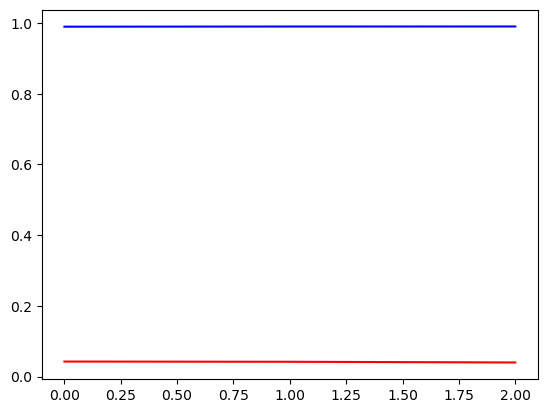

In [64]:
plt.plot(fit.history['accuracy'], 'b-')
plt.plot(fit.history['loss'], 'r-')
plt.plot()

In [66]:
texto = 'the painting wants money in taboao da serra'
texto_encoded = encode_review( texto, dicionario )
texto_encoded

[66, 20, 645, 2632, 23, 0, 9201, 0]

In [69]:
texto_padded = pad_sequences([texto_encoded], value=dicionario['<PAD>'], padding='post', maxlen=256)

In [70]:
model.predict(texto_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[0.37055948, 0.03581548, 0.02465717, 0.5689678 ]], dtype=float32)